# CLASE 14 - Modelos supervisados
### Coderhouse - Data Science
Profe Jorge Ruiz

In [1]:
#pip install mlxtend --upgrade --no-deps

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 1.2 MB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.4 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

# Modelos supervisados


### Clasificación

In [25]:
# Cargar los datos
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


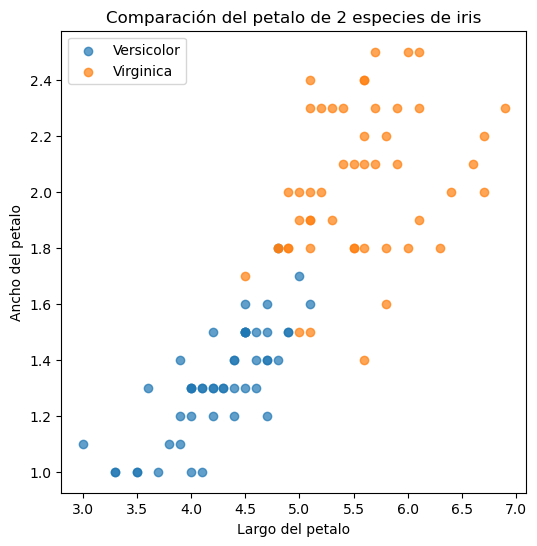

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df[df['species']=='versicolor']['petal_length'], df[df['species']=='versicolor']['petal_width'], alpha=0.7)
ax.scatter(df[df['species']=='virginica']['petal_length'], df[df['species']=='virginica']['petal_width'], alpha=0.7)
ax.set_title('Comparación del petalo de 2 especies de iris')
ax.set_xlabel('Largo del petalo')
ax.set_ylabel('Ancho del petalo')
ax.legend(['Versicolor', 'Virginica'], loc='upper left')

features = X <br>
target = y

In [26]:
X = df[df['species']!='setosa'][['petal_length', 'petal_width']]
X


,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [47]:
#y = df[df['species']!='setosa']['species'].replace({'versicolor':0, 'virginica':1})

#las etiquetas las debo pasar a números, en este caso tenemos un problema binario

y = pd.get_dummies(df[df['species']!='setosa']['species'])
y

#revisar más info en https://interactivechaos.com/es/manual/tutorial-de-machine-learning/la-funcion-getdummies

,versicolor,virginica
50,True,False
51,True,False
52,True,False
53,True,False
54,True,False
...,...,...
145,False,True
146,False,True
147,False,True
148,False,True


In [48]:
y.drop("versicolor", axis=1, inplace=True)
y.rename(columns={'virginica':"target"}, inplace=True)
y

In [49]:
y = y['target'].values.astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
# Paso 1
# Importar las librerias del modelo
from sklearn.linear_model import LogisticRegression

# Paso 2
# Crear la instancia del modelo
clf = LogisticRegression()

# Paso 3
# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y)

LogisticRegression()

In [51]:
X2= X.values
y2=y



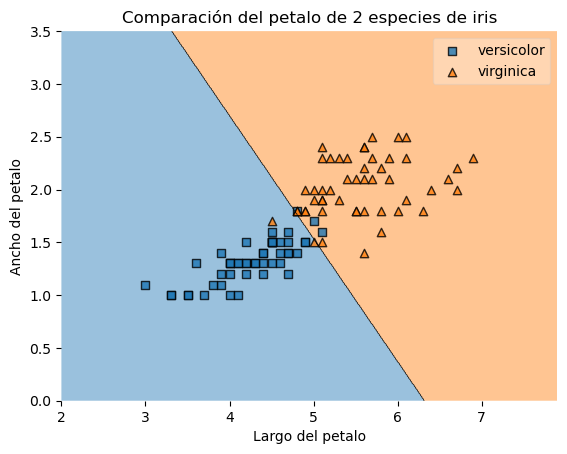

In [54]:

# revisar https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#plot_decision_regions-visualize-the-decision-regions-of-a-classifier
ax=plot_decision_regions(X2, y2, clf=clf)# Añadir anotaciones

plt.xlabel('Largo del petalo')
plt.ylabel('Ancho del petalo')
plt.title('Comparación del petalo de 2 especies de iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['versicolor', 'virginica'],
           framealpha=0.3, scatterpoints=1)
plt.show()

##Label Encoding-Ejemplo

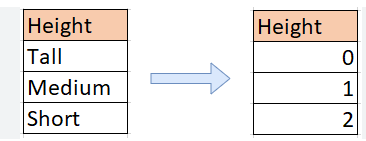

KNN


In [55]:
X = df[['petal_length', 'petal_width']]
y = df['species'].replace({'versicolor':0, 'virginica':1, 'setosa':2})

In [56]:
# Importar las librerias del modelo
from sklearn.neighbors import KNeighborsClassifier

# Crear la instancia del modelo
clf = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

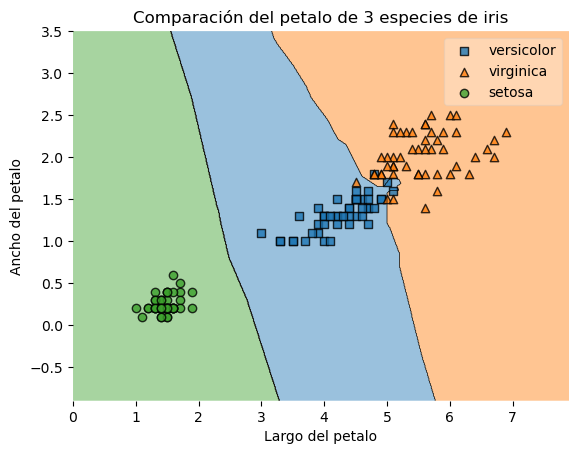

In [57]:
X2= X.values
y2= y.values

# revisar https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#plot_decision_regions-visualize-the-decision-regions-of-a-classifier
ax=plot_decision_regions(X2, y2, clf=clf)# Añadir anotaciones

plt.xlabel('Largo del petalo')
plt.ylabel('Ancho del petalo')
plt.title('Comparación del petalo de 3 especies de iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['versicolor', 'virginica', 'setosa'],
           framealpha=0.3, scatterpoints=1)
plt.show()

In [58]:
# Crear la instancia del modelo
clf = KNeighborsClassifier(n_neighbors=5)
# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y)

KNeighborsClassifier()

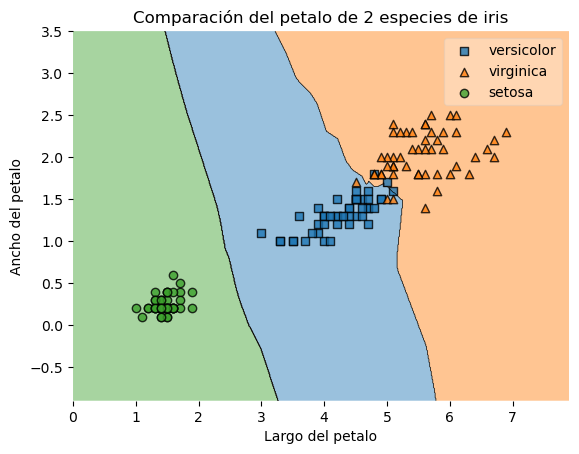

In [59]:
X2= X.values
y2= y.values



# revisar https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#plot_decision_regions-visualize-the-decision-regions-of-a-classifier
ax=plot_decision_regions(X2, y2, clf=clf)# Añadir anotaciones

plt.xlabel('Largo del petalo')
plt.ylabel('Ancho del petalo')
plt.title('Comparación del petalo de 2 especies de iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['versicolor', 'virginica', 'setosa'],
           framealpha=0.3, scatterpoints=1)
plt.show()

In [60]:

clf = KNeighborsClassifier(n_neighbors=11)
# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=11)

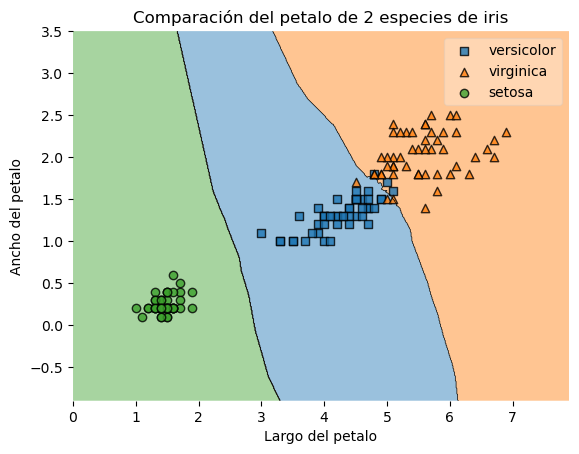

In [61]:
X2= X.values
y2= y.values

# revisar https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#plot_decision_regions-visualize-the-decision-regions-of-a-classifier
ax=plot_decision_regions(X2, y2, clf=clf)# Añadir anotaciones

plt.xlabel('Largo del petalo')
plt.ylabel('Ancho del petalo')
plt.title('Comparación del petalo de 2 especies de iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['versicolor', 'virginica', 'setosa'],
           framealpha=0.3, scatterpoints=1)
plt.show()

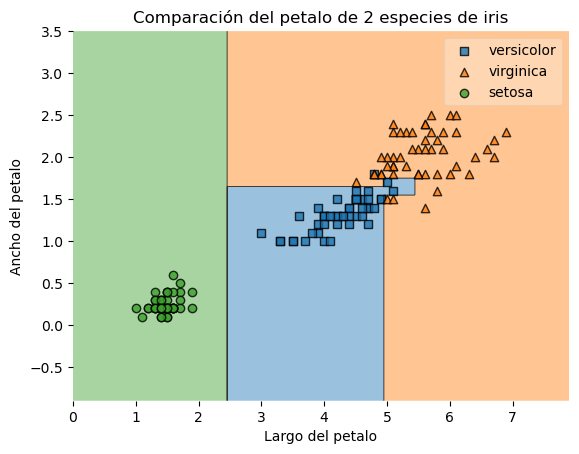

In [62]:
# Importar las librerias del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree


clf = DecisionTreeClassifier()
# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y)

X2= X.values
y2= y.values

# revisar https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#plot_decision_regions-visualize-the-decision-regions-of-a-classifier
ax=plot_decision_regions(X2, y2, clf=clf)# Añadir anotaciones

plt.xlabel('Largo del petalo')
plt.ylabel('Ancho del petalo')
plt.title('Comparación del petalo de 2 especies de iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['versicolor', 'virginica', 'setosa'],
           framealpha=0.3, scatterpoints=1)
plt.show()

#### Veamos un caso más complejo utilizando todas las variables de iris con un árbol de decisión

In [63]:
# Crear la instancia del modelo
clf = DecisionTreeClassifier(max_depth=6)

# Entrenar el modelo con los datos y la etiqueta
X= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= df['species']

#X = df.drop('species', axis=1)
#y = df['species']

clf = clf.fit(X, y)

In [65]:
"""
si lo corren en windows local, abrir anaconda prompt:
1) conda install graphviz
2) conda install python-graphviz
"""



   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00


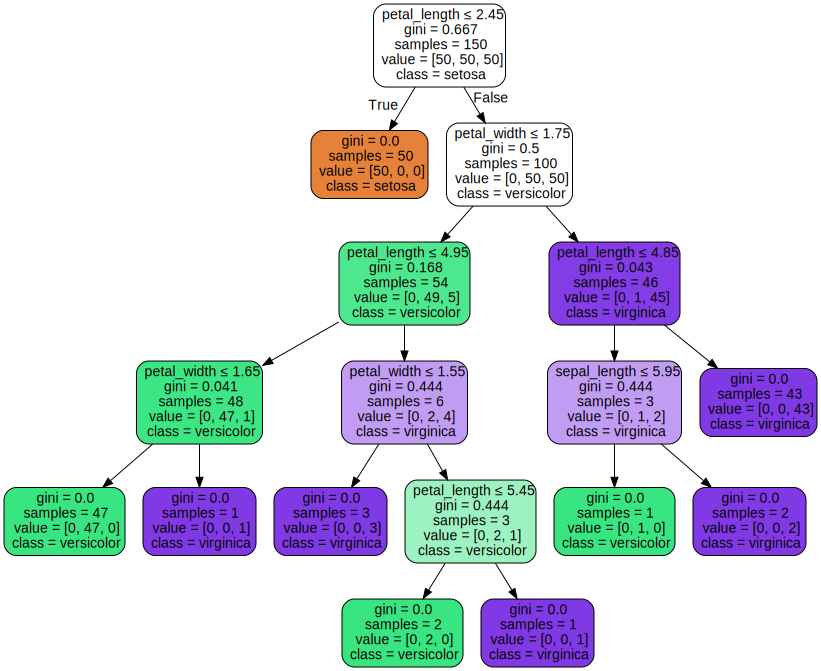

In [75]:
# Exportar el árbol de decisión a Graphviz
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=y.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

# A mayor índice de Gini menor pureza

# A menor índice de Gini mayor pureza


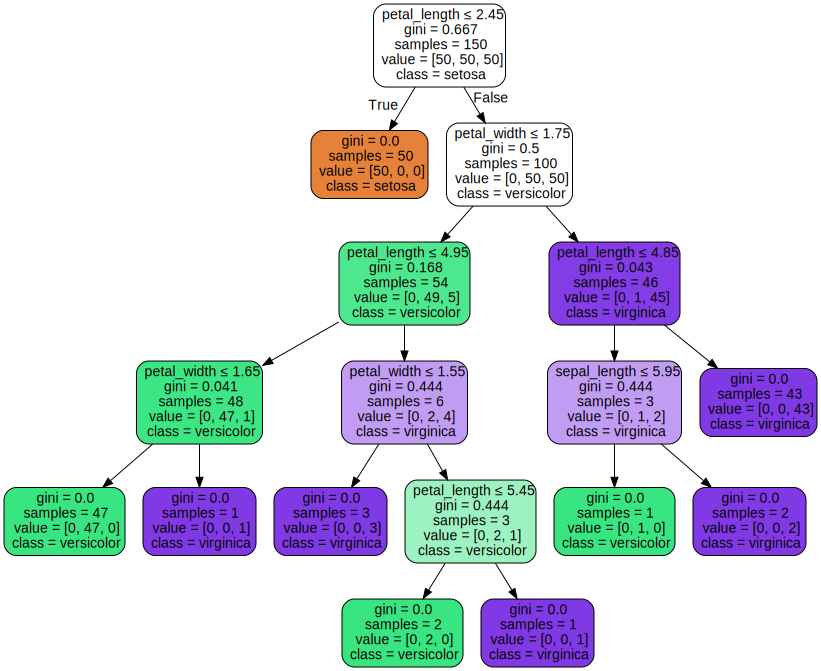

In [76]:
import graphviz
from IPython.display import display
from sklearn import tree

# Generate the dot data
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=X.columns,
                               class_names=y.unique(),
                               filled=True, rounded=True,
                               special_characters=True)

# Create the graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)

# Material adicional
#### Modelos supervisados
##### Clasificación y regresión:
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
#### Modelos no supervisados
##### Clustering:
https://scikit-learn.org/stable/modules/clustering.html#clustering
##### Reducción de la dimensionalidad:
https://scikit-learn.org/stable/modules/decomposition.html#decompositions
#### ¿Cómo escoger el algoritmo correcto?
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html